In [1]:
import os
import warnings
import numpy as np
import pylab as plt
import networkx as nx
from os.path import join
from copy import deepcopy
from scipy import signal
from helpers import simulator, wrapper_visualize
warnings.filterwarnings("ignore")

data_path = "output"
if not os.path.exists(data_path):
    os.makedirs(data_path)

In [2]:
# Load SC and Distances
SC = np.loadtxt(join("data/connectivity", "weights.txt"))
Dist = np.loadtxt(join("data/connectivity", "tract_lengths.txt")) / 1000.0
np.fill_diagonal(SC, 0.0)
np.fill_diagonal(Dist, 0.0)

SC = SC/np.max(SC)
SC = np.abs(SC) * 2.0
assert(np.trace(SC) == 0.0)
nn = num_nodes = SC.shape[0]

freq = 40.0
omega = 2*np.pi*freq * np.ones(nn)

params = {
    "G": 0.5,                      # global coupling strength
    "a": -5.0,                     # biforcatio parameter
    "dt": 1e-4,                    # time step [s]
    'sigma_r': 1e-4,              # noise strength
    'sigma_v': 1e-4,              # noise strength
    'omega': omega,                # natural frequency [Hz]
    "fix_seed": 0,
    "velocity": 6.0,

    "t_transition": 2.0,           # transition time [s]
    "t_end": 10.0,               # end time        [s]

    "weights": SC,                     # weighted connection matrix
    "distances": Dist,                  # distance matrix
    "record_step": 2,              # sampling every n step from mpr time series

    "data_path": "output",         # output directory
    "control": ["G", "velocity"],              # control parameters
    "RECORD_TS": 1,                # true to store large time series in file
}

fmax = 40.283203125 Hz, Pxx = 7.385229725251163e-10


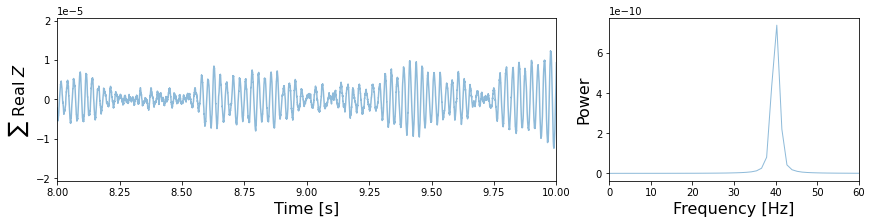

In [3]:
# data = simulator(params)
# print(data['t'].shape, data['x'].shape)
control_par = {"G": 0.5, "velocity": 6.0}
wrapper_visualize(params, control_par)

fmax = 9.765625 Hz, Pxx = 9.65607260650054e-14


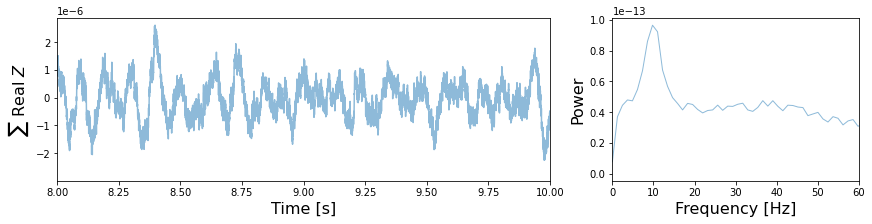

In [4]:
control_par = {"G": 1200.0, "velocity": 27.0}
wrapper_visualize(params, control_par)

fmax = 2.44140625 Hz, Pxx = 4.597113953690035e-14


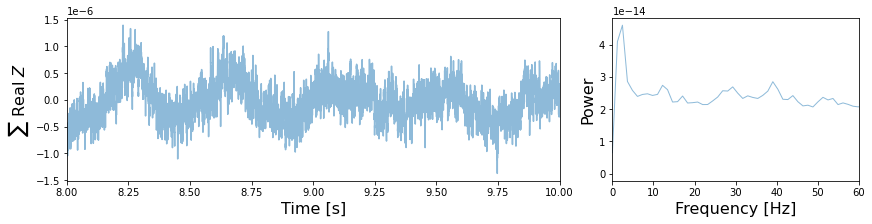

In [5]:
control_par = {"G": 1600.0, "velocity": 6.0}
wrapper_visualize(params, control_par)